# 1. Data Preparation & Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Konfigurasi Visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Path dataset (Pastikan sesuai dengan yang ada di sidebar kanan Kaggle Anda)
path = "/kaggle/input/brazilian-ecommerce/" 

# Load data
orders = pd.read_csv(path + 'olist_orders_dataset.csv')
items = pd.read_csv(path + 'olist_order_items_dataset.csv')
products = pd.read_csv(path + 'olist_products_dataset.csv')
customers = pd.read_csv(path + 'olist_customers_dataset.csv')
translations = pd.read_csv(path + 'product_category_name_translation.csv')

# 1. Integrasi Data
df = orders.merge(items, on='order_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(customers, on='customer_id', how='left')
df = df.merge(translations, on='product_category_name', how='left')

# 2. Konversi Waktu
datetime_cols = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col])

# 3. Fitur Engineering (PENTING: Menambahkan kolom untuk analisis)
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
df['category'] = df['product_category_name_english']
df['total_price'] = df['price'] + df['freight_value']

print("Data berhasil digabungkan dan kolom 'order_month' telah dibuat!")
df.head()

Data berhasil digabungkan dan kolom 'order_month' telah dibuat!


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,order_month,category,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017-10,housewares,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery,2018-07,perfumery,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto,2018-08,auto,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,pet_shop,2017-11,pet_shop,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,stationery,2018-02,stationery,28.62


# 2: Analisis Tren Penjualan (Business Growth)

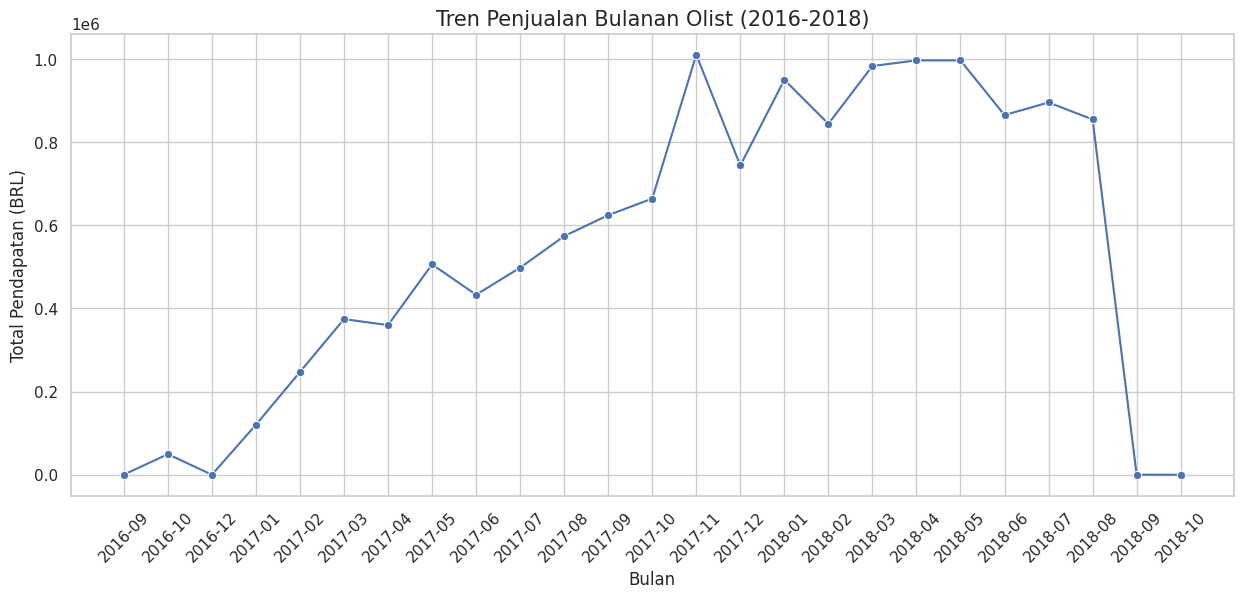

In [2]:
# Menghitung total pendapatan per bulan
monthly_sales = df.groupby('order_month')['price'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales, x='order_month', y='price', marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Tren Penjualan Bulanan Olist (2016-2018)', fontsize=15)
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan (BRL)')
plt.show()

# 3: Produk Terlaris

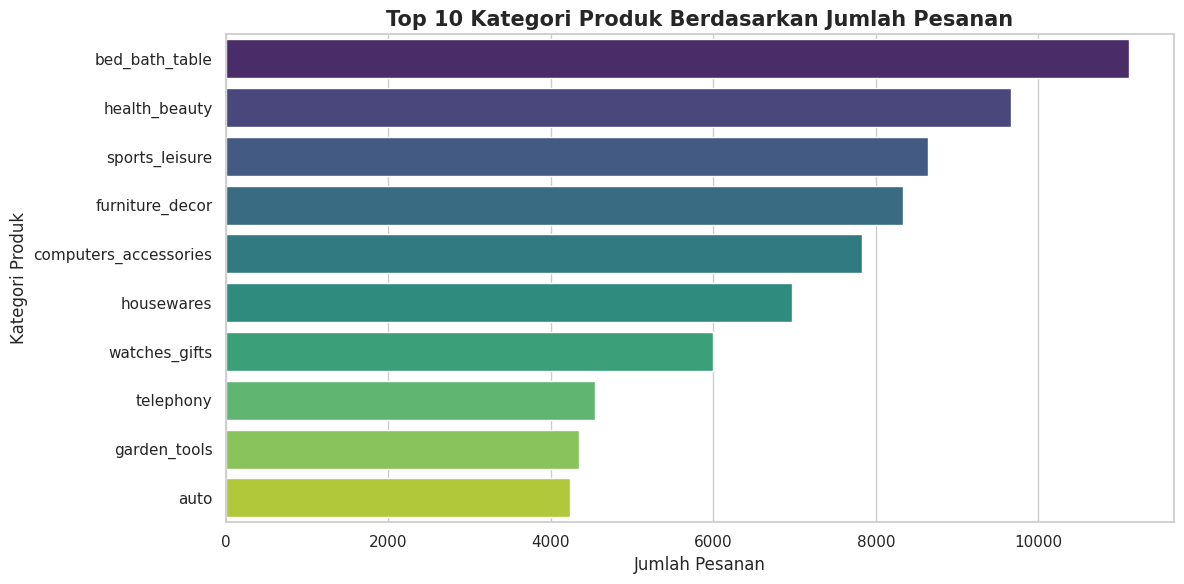

In [3]:
# 10 Kategori produk teratas
top_categories = df['category'].value_counts().head(10)

plt.figure(figsize=(12, 6))

# Perbaikan: Tambahkan hue=top_categories.index dan legend=False
sns.barplot(
    x=top_categories.values, 
    y=top_categories.index, 
    hue=top_categories.index, 
    palette='viridis', 
    legend=False
)

plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Pesanan', fontsize=15, fontweight='bold')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()

# 4. lokasi pelanggan terbanyak

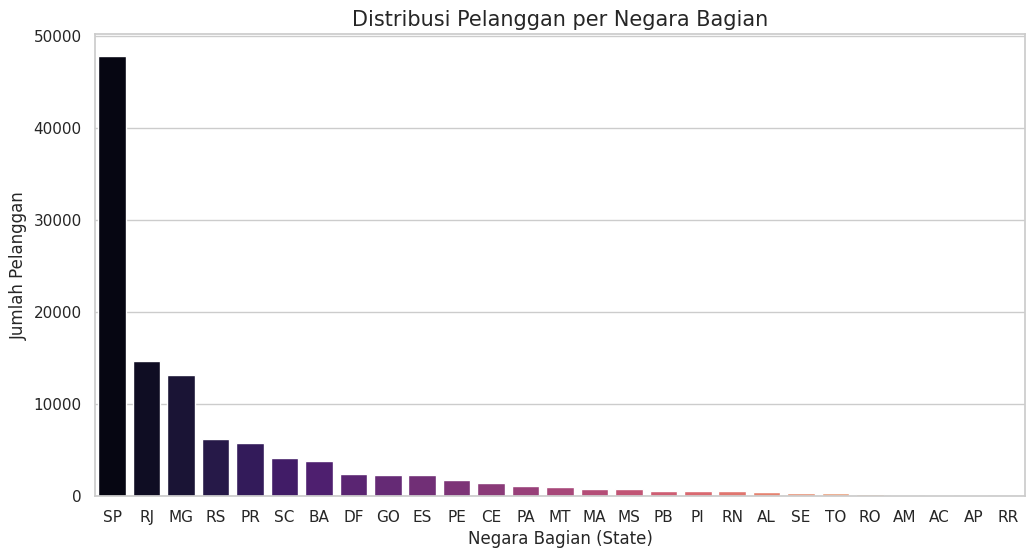

In [4]:
# Analisis lokasi pelanggan
state_counts = df['customer_state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='magma', legend=False)
plt.title('Distribusi Pelanggan per Negara Bagian', fontsize=15)
plt.xlabel('Negara Bagian (State)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# 5. Customer Segmentation (RFM Analysis)


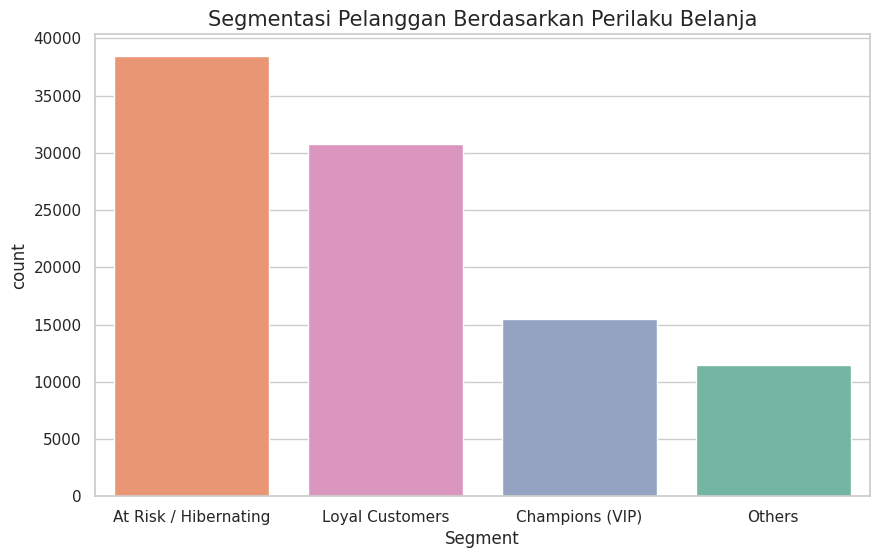

Ringkasan RFM:
Segment
At Risk / Hibernating    38430
Loyal Customers          30733
Champions (VIP)          15453
Others                   11480
Name: count, dtype: int64


In [5]:
# 1. Menentukan tanggal referensi (asumsi hari ini adalah sehari setelah pesanan terakhir)
latest_date = df['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# 2. Menghitung Recency, Frequency, dan Monetary
rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days, # Recency
    'order_id': 'nunique',                                             # Frequency
    'total_price': 'sum'                                               # Monetary
})

# Rename kolom
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# 3. Memberikan skor 1-5 (Semakin tinggi semakin bagus)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# 4. Membuat Segmentasi Sederhana
def segment_customer(df):
    if df['R_score'] >= 4 and df['F_score'] >= 4:
        return 'Champions (VIP)'
    elif df['R_score'] >= 3 and df['F_score'] >= 2:
        return 'Loyal Customers'
    elif df['R_score'] <= 2:
        return 'At Risk / Hibernating'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Visualisasi Segmentasi
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', hue='Segment', palette='Set2', order=rfm['Segment'].value_counts().index)
plt.title('Segmentasi Pelanggan Berdasarkan Perilaku Belanja', fontsize=15)
plt.show()

print("Ringkasan RFM:")
print(rfm['Segment'].value_counts())

In [7]:
# Simpan data untuk dashboard
df.to_csv('all_data.csv', index=False)
rfm.to_csv('rfm_data.csv', index=True)

print("File siap! Silakan download 'all_data.csv' dan 'rfm_data.csv' dari bagian Output Kaggle.")

File siap! Silakan download 'all_data.csv' dan 'rfm_data.csv' dari bagian Output Kaggle.
